# Problema da Mochila:

O problema da mochila (em inglês, Knapsack problem) é um problema de optimização combinatória. O nome dá-se devido ao modelo de uma situação em que é necessário preencher uma mochila com objetos de diferentes pesos e valores. O objetivo é que se preencha a mochila com o maior valor possível, não ultrapassando o peso máximo.


O problema da mochila é um dos 21 problemas NP-completos de Richard Karp, exposto em 1972. A formulação do problema é extremamente simples, porém sua solução é mais complexa. Este problema é a base do primeiro algoritmo de chave pública (chaves assimétricas).


Normalmente este problema é resolvido com programação dinâmica, obtendo então a resolução exata do problema, mas também sendo possível usar PSE (procedimento de separação e evolução). Existem também outras técnicas, como usar algoritmo guloso, meta-heurística (algoritmos genéticos) para soluções aproximadas.


In [ ]:
# Lendo a base de dados dos Testes
import pandas as pd
teste = pd.read_csv('tempos_de_execucao_1000_multi_4_thread.csv')
print('Tamanho da Amostra: %d' %len(teste))
display(teste.head())

Tamanho da Amostra: 1000


,Unnamed: 0,Tempo
0,0,15.258230
1,1,15.976430
2,2,19.304538
3,3,15.986149
4,4,17.708603


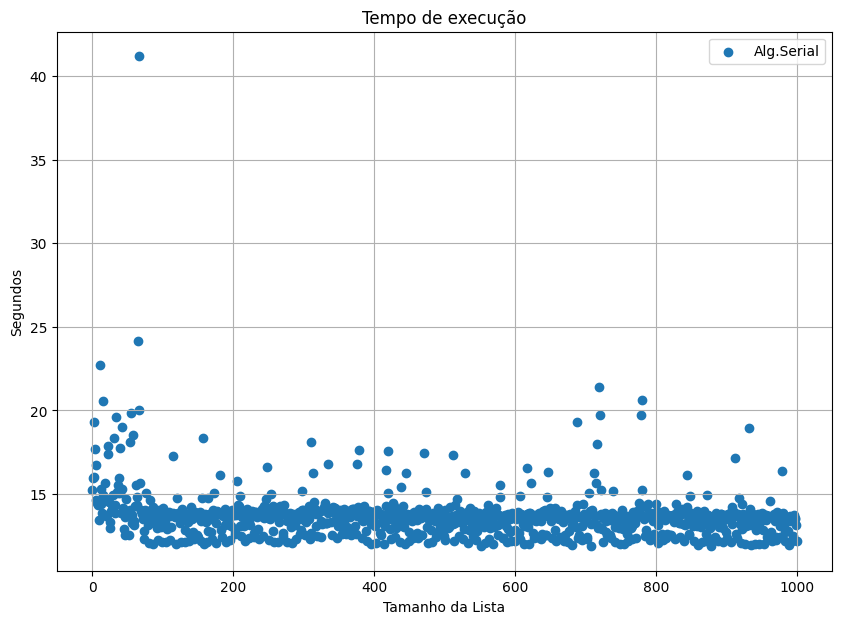

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(teste.index, teste['Tempo'], label='Alg.Serial')
plt.title('Tempo de execução')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Segundos')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Obtenção dos valores centrais
media   = teste['Tempo'].mean()
d_pad   = teste['Tempo'].std()
mediana = teste['Tempo'].median()

print('Media: %.3f' %media)
print('Desvio Padrão: %.3f' %d_pad)
print('Mediana: %.3f' %mediana)

Media: 13.705
Desvio Padrão: 1.529
Mediana: 13.675


In [ ]:
# Aplicando regra de Sturges para obtenção de intervalos de valores
# Cálculo do intervalo de freqûencia: n = Tamanho da Amostra
import numpy as np

n = len(teste)
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
print(f'Tamanho da Amostra: {k}')

Tamanho da Amostra: 11


In [ ]:
# Coletando a frequência
tempo_exec_freq = np.histogram(teste['Tempo'], bins= k)
print(tempo_exec_freq)

(array([905,  65,  23,   4,   2,   0,   0,   0,   0,   0,   1]), array([11.871984  , 14.53783224, 17.20368047, 19.86952871, 22.53537694,
       25.20122517, 27.86707341, 30.53292164, 33.19876987, 35.86461811,
       38.53046634, 41.19631457]))


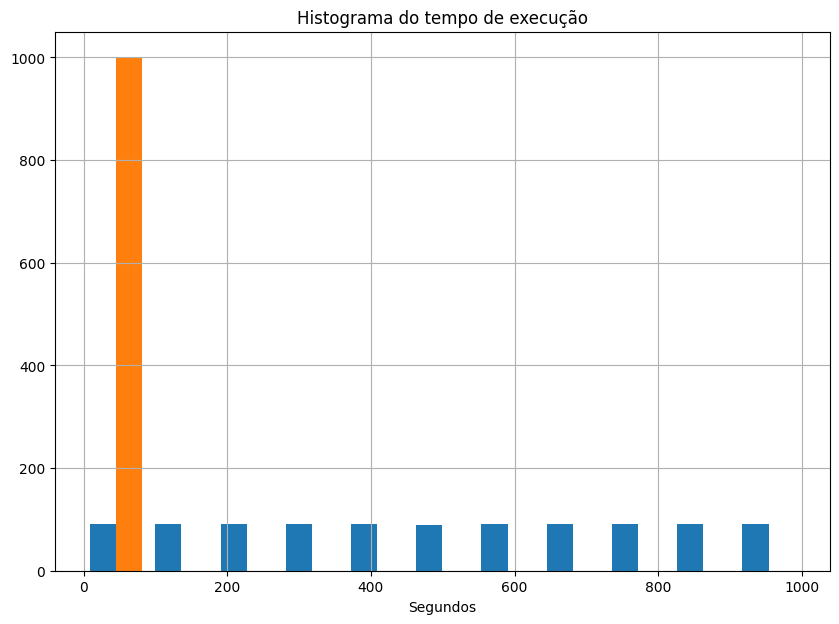

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(teste, bins = k)
plt.title('Histograma do tempo de execução')
plt.xlabel('Segundos')
plt.grid()
plt.show()

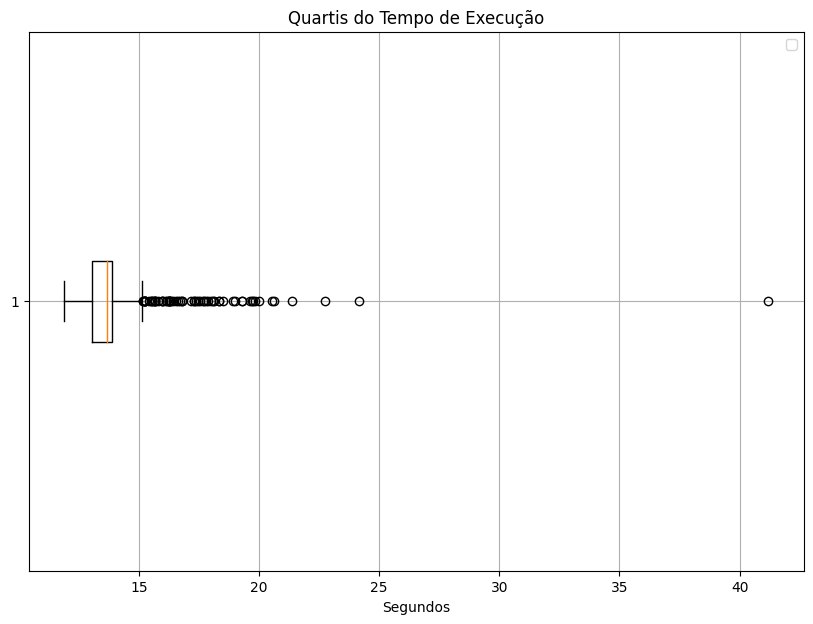

In [ ]:
# Gráfico BoxPlot
plt.figure(figsize=(10,7))
plt.boxplot(teste['Tempo'], vert = False)
plt.title('Quartis do Tempo de Execução')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Aplicando a Regras Chauvenet - Remoção de Outliers
cond1 = teste['Tempo'] < (media + 2 * d_pad)
cond2 = teste['Tempo'] > (media - 2 * d_pad)
teste = teste[cond1 & cond2]
print('Tamanho da Amostra: %d' %(len(teste)))
teste.head()


Tamanho da Amostra: 967


,Unnamed: 0,Tempo
0,0,15.258230
1,1,15.976430
3,3,15.986149
5,5,16.723785
6,6,14.646729


In [ ]:
# Salvando os dados da Amostra
teste.to_csv('amostra_testes_serial_corrigido.csv', index=False)

In [ ]:
# Lendo a base de dados dos Testes
import pandas as pd
teste = pd.read_csv('amostra_testes_serial_corrigido.csv')
teste.head()

,Unnamed: 0,Tempo
0,0,15.258230
1,1,15.976430
2,3,15.986149
3,5,16.723785
4,6,14.646729


### Apresentação dos dados sem Outliers

In [ ]:
# Obtenção dos valores centrais
media   = teste['Tempo'].mean()
d_pad   = teste['Tempo'].std()
mediana = teste['Tempo'].median()

print('Media: %.3f' %media)
print('Desvio Padrão: %.3f' %d_pad)
print('Mediana: %.3f' %mediana)

Media: 13.507
Desvio Padrão: 0.792
Mediana: 13.661


In [ ]:
# Aplicando regra de Sturges para obtenção de intervalos de valores
# Cálculo do intervalo de freqûencia: n = Tamanho da Amostra
import numpy as np

n = len(teste)
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
print(f'Tamanho da Amostra: {k}')

Tamanho da Amostra: 11


In [ ]:
# Coletando a frequência
tempo_exec_freq = np.histogram(teste['Tempo'], bins= k)
print(tempo_exec_freq)

(array([ 89,  98,  97, 175, 381,  64,  23,  16,   9,   9,   6]), array([11.871984  , 12.31305679, 12.75412958, 13.19520237, 13.63627516,
       14.07734795, 14.51842074, 14.95949353, 15.40056632, 15.84163911,
       16.2827119 , 16.72378469]))


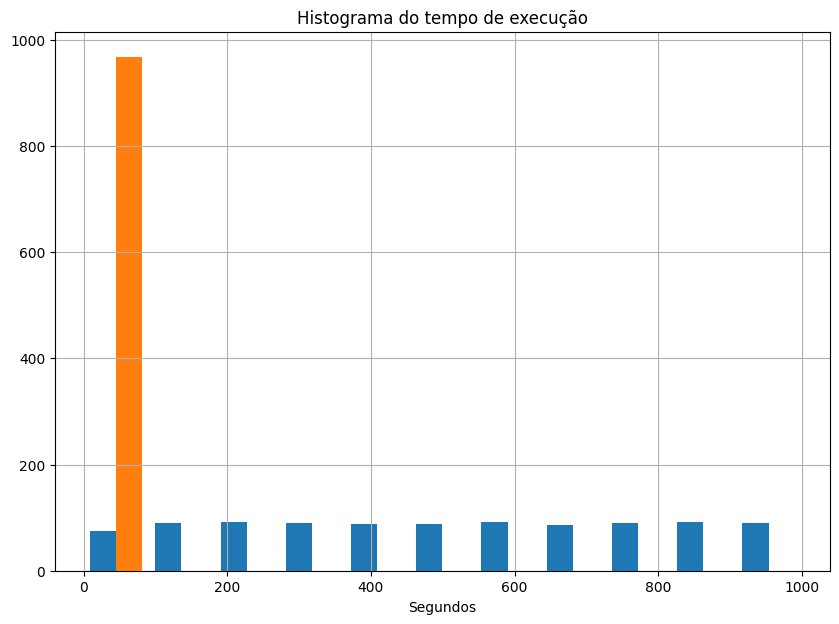

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.hist(teste, bins = k)
plt.title('Histograma do tempo de execução')
plt.xlabel('Segundos')
plt.grid()
plt.show()

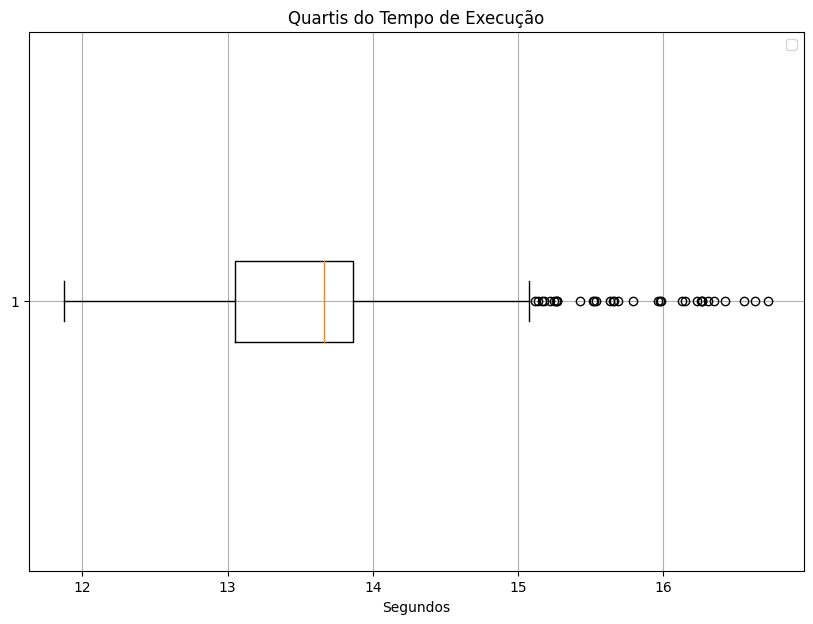

In [ ]:
# Gráfico BoxPlot
plt.figure(figsize=(10,7))
plt.boxplot(teste['Tempo'], vert = False)
plt.title('Quartis do Tempo de Execução')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

### Aplicando o Teorema do Limite Central

In [ ]:
# Parâmetros para uma media de amostragens
tam_amost = 60
qtd_amost = 1000

In [ ]:
# Obtendo a media de amostragens
import pandas as dp
amostra = []
for i in range(qtd_amost):
    amostra.append(teste.sample(n=tam_amost).mean()[0])
amostra = dp.DataFrame(data = amostra, columns=['Tempo'])
amostra.head()

,Tempo
0,501.816667
1,509.783333
2,536.866667
3,477.066667
4,533.100000


In [ ]:
# Valores Centrais da amostragem
amostra_media   = amostra['Tempo'].mean()
amostra_std     = amostra['Tempo'].std()
amostra_mediana = amostra['Tempo'].median()
print('** Valores Centrais da Amostra **')
print('Média da amostra:       %.4f' %amostra_media)
print('Desv.Padrão da amostra: %.4f' %amostra_std)
print('Mediana da amostra:     %.4f' %amostra_mediana)

** Valores Centrais da Amostra **
Média da amostra:       507.1965
Desv.Padrão da amostra: 35.1249
Mediana da amostra:     506.8667


In [ ]:
# Desvio Padrão de inferência calculado
round(d_pad / np.sqrt(tam_amost),4)

0.1023

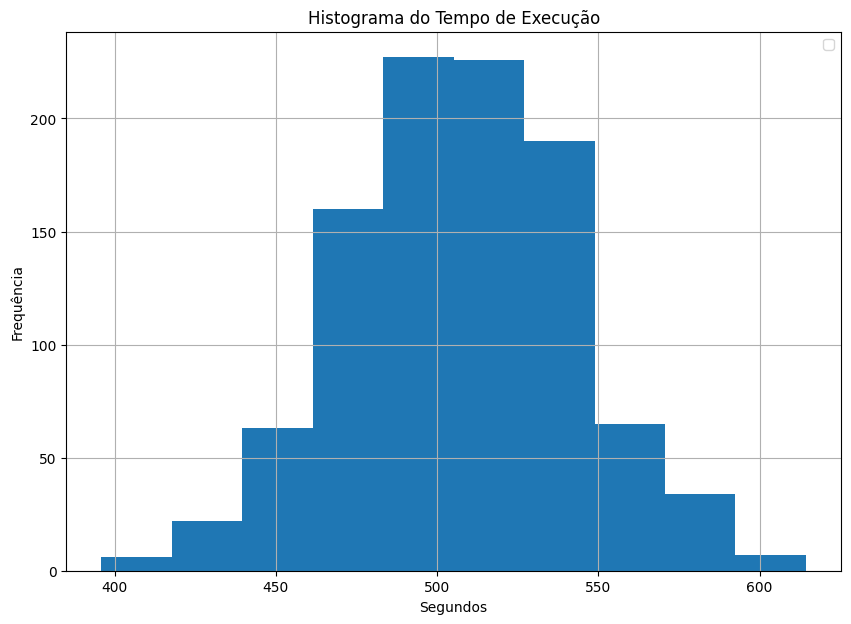

In [ ]:
# Visualizando a amostra:
plt.figure(figsize=(10,7))
plt.hist(amostra)
plt.title('Histograma do Tempo de Execução')
plt.ylabel('Frequência')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from scipy.stats import norm
# Considerando a confiança de 99%
intervalo = norm.interval(alpha = 0.99, loc = amostra_media, scale = amostra_std)

<ipython-input-21-1ebb1728597e>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.99, loc = amostra_media, scale = amostra_std)


In [ ]:
print('Com uma média de execução %.4f segundos, oscilando entre %.4f e %.4f segundos, com a certeza de 99%c'\
        % (amostra_media, intervalo[0], intervalo[1], '%'))

Com uma média de execução 507.1965 segundos, oscilando entre 416.7208 e 597.6721 segundos, com a certeza de 99%


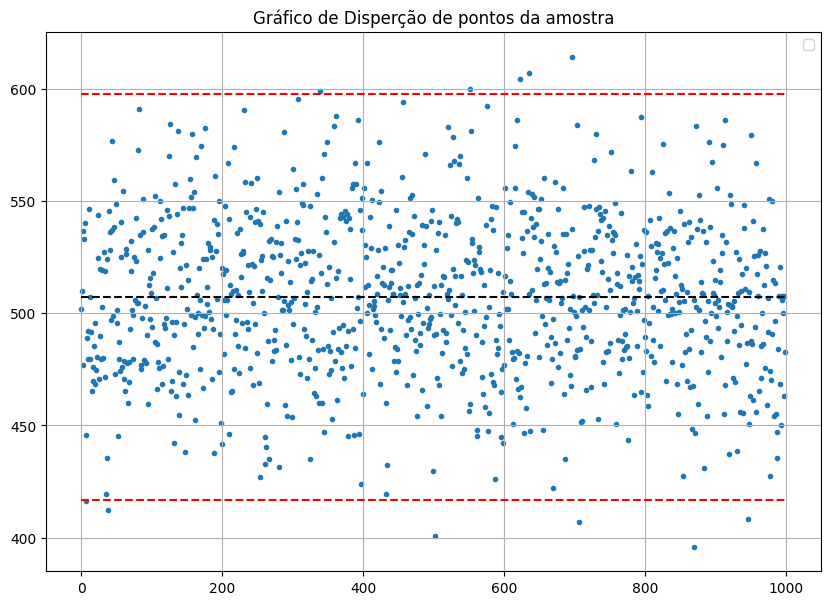

In [ ]:
# Visualizando a disperção de Pontos da Amostra
plt.figure(figsize=(10,7))
plt.scatter([i for i in range(qtd_amost)], amostra, marker='.')
plt.hlines(y=intervalo[0], xmin=0, xmax=qtd_amost, color='red', linestyles='dashed')
plt.hlines(y=intervalo[1], xmin=0, xmax=qtd_amost, color='red', linestyles='dashed')
plt.hlines(y=amostra_media, xmin=0, xmax=qtd_amost, color='black', linestyles='dashed')
plt.title('Gráfico de Disperção de pontos da amostra')
plt.legend()
plt.grid()
plt.show()